# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### 1.0.1. Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
#!pip install shap
import shap
shap.initjs()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
#load WHR data set
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
df = pd.read_csv(WHRDataSet_filename, header=0)

In [4]:
df

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,Zimbabwe,2013,4.690188,7.565154,0.799274,48.949745,0.575884,-0.076716,0.830937,0.711885,0.182288,0.527755,-1.026085,-1.526321,1.964805,0.418918,NaN,0.432,0.555439
1558,Zimbabwe,2014,4.184451,7.562753,0.765839,50.051235,0.642034,-0.045885,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899,NaN,0.432,0.601080
1559,Zimbabwe,2015,3.703191,7.556052,0.735800,50.925652,0.667193,-0.094585,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776,NaN,0.432,0.655137
1560,Zimbabwe,2016,3.735400,7.538829,0.768425,51.800068,0.732971,-0.065283,0.723612,0.737636,0.208555,0.699344,-0.863044,-1.371214,2.776363,0.743257,NaN,0.432,0.596690


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [5]:
# inspect dataframe dimensions
print(f"The WHR data set has {df.shape[0]} rows and {df.shape[1]} columns.")
df.head(10)

The WHR data set has 1562 rows and 19 columns.


,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


After inspecting the dimensions and first ten rows of our dataframe, we decided to drop the
two columns involving standard deviation of life ladder since they are dependent on our label,
life ladder. We also dropped year since we do not plan to utilize the time-series nature of our
dataframe. We keep the country variable for imputations and interpretations but do not plan to
include it in our model. After dropping the three columns, we renamed the remaining columns.

In [6]:
#drop unused columns: 'year' and 'standard deviation of life ladder'
df.drop(['Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'year'], axis=1, inplace=True)

#rename columns
new_column_names = {
    'Life Ladder': 'life_ladder',
    'Log GDP per capita': 'log_gdp_per_capita',
    'Social support': 'social_support',
    'Healthy life expectancy at birth': 'life_expectancy',
    'Freedom to make life choices': 'freedom_of_choice',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'corruption',
    'Positive affect': 'positive_affect',
    'Negative affect': 'negative_affect',
    'Confidence in national government': 'gov_confidence',
    'Democratic Quality': 'democracy',
    'Delivery Quality': 'delivery',
    'GINI index (World Bank estimate)': 'gini_wb',
    'GINI index (World Bank estimate), average 2000-15': 'gini_avg',
    'gini of household income reported in Gallup, by wp5-year': 'gini_gallup'
}
df.rename(columns=new_column_names, inplace=True)

After preliminary variable selection and renaming, we proceed to address missingness in our
dataframe. We perform imputation with the average value by country under the assumption that
a feature for a country does not vary too much within the time frame of our data collection.

In [7]:
# check # of missing values for each column
df.isna().sum()

country                 0
life_ladder             0
log_gdp_per_capita     27
social_support         13
life_expectancy         9
freedom_of_choice      29
generosity             80
corruption             90
positive_affect        18
negative_affect        12
gov_confidence        161
democracy             171
delivery              171
gini_wb               979
gini_avg              176
gini_gallup           357
dtype: int64

In [8]:
# imputate na's with average value by country
filtered_column_names = list(df.drop('country', axis=1).columns)
for name in filtered_column_names:
    mean_col = df.groupby('country')[name].transform('mean')
    # Fill missing values in a column with the calculated mean for each country
    df[name] = df[name].fillna(mean_col)
# missing values after imputation
df.isna().sum()

country                 0
life_ladder             0
log_gdp_per_capita     12
social_support          1
life_expectancy         9
freedom_of_choice       0
generosity             13
corruption             22
positive_affect         1
negative_affect         0
gov_confidence         74
democracy              32
delivery               32
gini_wb               289
gini_avg              176
gini_gallup             6
dtype: int64

Since Gini index by the World Bank is not calculated every year, and for some country, it only
has an average value from 2000 to 2015, we perform additional imputation by filling missing
values in gini_wb with corresponding values in gini_avg, if possible. After performing this step, we drop the gini_avg variable since it is redundant, and drop all rows that still contain missing values after imputation.

In [9]:
# fill additional na's in 'gini_wb' with 'gini_avg', if possible
for i, value in enumerate(df['gini_wb']):
    if pd.isna(value) and not pd.isna(df.at[i, 'gini_avg']):
        df.at[i, 'gini_wb'] = df.at[i, 'gini_avg']
# missing values after imputation
df.isna().sum()

country                 0
life_ladder             0
log_gdp_per_capita     12
social_support          1
life_expectancy         9
freedom_of_choice       0
generosity             13
corruption             22
positive_affect         1
negative_affect         0
gov_confidence         74
democracy              32
delivery               32
gini_wb               176
gini_avg              176
gini_gallup             6
dtype: int64

In [10]:
# drop missing values after imputation
df.drop('gini_avg', axis=1, inplace=True)
df.dropna(inplace=True)
# print dimensionality of final dataset
print(f"The cleaned WHR data set has {df.shape[0]} rows and {df.shape[1]} columns.")

The cleaned WHR data set has 1352 rows and 15 columns.


In [70]:
# find row # for SHAP
#df[df['country'] == 'United States'].index #1272
#df[df['country'] == 'Ukraine'].index #1248
#df[df['country'] == 'Costa Rica'].index #281

We include a correlation matrix to inspect the correlation between pairs of variables. We can
observe that there exist strong positive correlations between life ladder and GDP, social support,
life expectancy, which conform to our expectation. There exist negative correlations between life
ladder and corruption, negative affect, and gini, which also are what we expected. Note that
a lower gini indicates more income and wealth equality. To our surprise, there is a very weak
negative to almost no correlation between life ladder and government confidence.

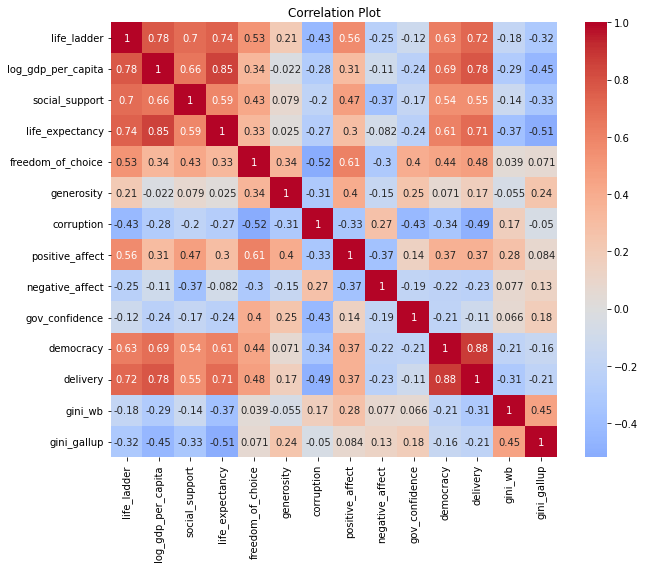

In [12]:
# correlation matrix
correlation_matrix = df.corr()
# change figure size
plt.figure(figsize=(10, 8))
# plot correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Plot')
plt.show()

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [77]:
#label
y = df['life_ladder']
columns_to_drop = ['life_ladder', 'country']

#features
X = df.drop(columns = columns_to_drop, axis=1)

In [14]:
#create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

For our project, we plan to utilize linear regression, gradient-boosting decision tree (GBDT),
random forest (RF), and neural network as potential models to predict life ladder.

### 1.3.1 Linear Regression

For linear regression, we start with a basic linear regression model.

In [15]:
#linear regression model
lr_model = LinearRegression()

#fit LR model
lr_model.fit(X_train, y_train)

# Make predictions on the test data 
lr_pred = lr_model.predict(X_test)

#evaluate performance using RMSE and r^2
lr_rmse = mean_squared_error(y_test, lr_pred, squared=False)
lr_r2 = r2_score(y_test, lr_pred)

print('\nLinear Regression Model Performance\n\nRMSE =   %.2f'
      % lr_rmse)
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % lr_r2)


Linear Regression Model Performance

RMSE =   0.52
 R^2 =   0.80


We then proceed to improve our linear model by standardizing our features and include second
degree polynomials of all features. We use L2 regularization to reduce the risk of overfitting
after including polynomials. The resulting RMSE and rˆ2 show improvements from the baseline
model.

In [16]:
steps = [
('scalar', StandardScaler()),
('poly', PolynomialFeatures(degree=2)),
('model', Ridge(alpha=10, fit_intercept=True))
]
lr2_model = Pipeline(steps)
lr2_model.fit(X_train, y_train)
lr2_pred = lr2_model.predict(X_test)

# evaluate performance using RMSE and r^2

lr2_rmse = mean_squared_error(y_test, lr2_pred, squared=False)
lr2_r2 = r2_score(y_test, lr2_pred)
print('\nLinear Regression Model Performance\n\nRMSE = %.2f'% lr2_rmse)
print('R^2 = %.2f'% lr2_r2)


Linear Regression Model Performance

RMSE = 0.44
R^2 = 0.85


### 1.3.2 Gradient-Boosted Decision Tree (GBDT)

Our second model is a gradient-boosting decision tree. We start by using grid search to find the best-
performing hyperparameters. Then, we fit the model using the best-performing hyperparameters
and plot feature importances, which is possible because we are using a tree-based model.

In [17]:
#GBDT parameters for gridsearchCV
gbdt_param_grid = {'max_depth':[2,4,8,16], 'n_estimators':[50,100,200,300,500]}
gbdt_param_grid

{'max_depth': [2, 4, 8, 16], 'n_estimators': [50, 100, 200, 300, 500]}

In [18]:
print("Running Grid Search...")
#create GBDT model
gbdt_model = GradientBoostingRegressor(random_state = 42)

#fit gridsearchCV
gbdt_grid = GridSearchCV(gbdt_model, gbdt_param_grid, cv=3, scoring='neg_root_mean_squared_error')
gbdt_grid_search = gbdt_grid.fit(X_train, y_train)
print('Done')

Running Grid Search...
Done


In [19]:
#get the best GBDT parameter from gridsearchCV
gbdt_grid_search.best_params_

{'max_depth': 4, 'n_estimators': 300}

In [20]:
#create GBDT model with best parameters
gbdt_model = GradientBoostingRegressor(max_depth = 4, n_estimators =300, random_state = 42)
#train GBDT model
gbdt_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
#make prediction of GBDT model on the test set
gbdt_pred = gbdt_model.predict(X_test)

#evaluate GBDT performance using RMSE and r^2
gbdt_rmse = mean_squared_error(y_test, gbdt_pred, squared = False)
gbdt_r2 = r2_score(y_test, gbdt_pred)
print('\nGBDT Model Performance\n\nRMSE = %.2f'% gbdt_rmse)
print('R^2 = %.2f'% gbdt_r2)


GBDT Model Performance

RMSE = 0.34
R^2 = 0.91


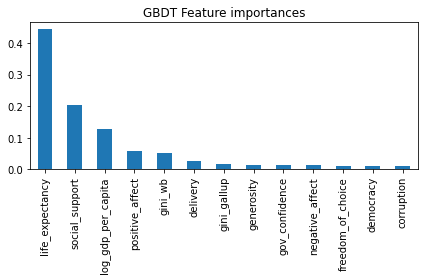

In [22]:
#feature importance 
gbdt_importances = pd.Series(gbdt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
#plot feature importances
fig, ax = plt.subplots()
gbdt_importances.plot.bar(ax=ax)
ax.set_title("GBDT Feature importances")
fig.tight_layout()

### 1.3.3. Random Forest

Our third model is random forest. Similar to GBDT, we start by using grid search to find the best-performing hyperparameters. Then, we fit the model using the best performing hyperparameters and plot feature importances, which is possible because we are using a tree-based model.

In [23]:
# parameter grid for RF
rf_param_grid = {'max_depth':[2,4,8,16,32], 'n_estimators':[25,50,100,200,300]}
rf_param_grid

{'max_depth': [2, 4, 8, 16, 32], 'n_estimators': [25, 50, 100, 200, 300]}

In [24]:
print('Running Grid Search...')
# create RF model
rf_regressor = RandomForestRegressor()
# fit gridsearchCV
rf_grid = GridSearchCV(rf_regressor, rf_param_grid, cv=3,scoring='neg_root_mean_squared_error')
rf_grid_search = rf_grid.fit(X_train, y_train)
print('Done')

Running Grid Search...
Done


In [25]:
#get best parameters from gridsearch
rf_grid_search.best_params_

{'max_depth': 16, 'n_estimators': 300}

In [26]:
#create RF model with best parameters
rf_model = RandomForestRegressor(max_depth = 16, n_estimators = 300, random_state = 42)

#train RF model
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [27]:
#make prediction of RF model on test set
rf_pred = rf_model.predict(X_test)

# evaluate RF performance using RMSE and r^2
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_r2 = r2_score(y_test, rf_pred)
print('\nRandom Forest Model Performance\n\nRMSE = %.2f'% rf_rmse)
print('R^2 = %.2f'% rf_r2)


Random Forest Model Performance

RMSE = 0.34
R^2 = 0.91


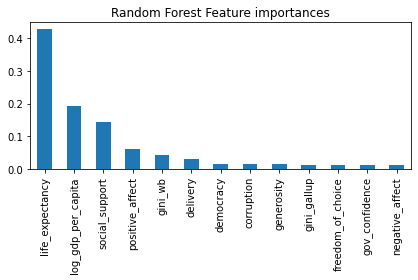

In [28]:
# feature importances
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
# plot feature importances
fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title("Random Forest Feature importances")
fig.tight_layout()

### 1.3.4 Neural Network

For our final model, we implement a neural network, which excels at capturing complicated relationships. We examined both training and test performances to avoid overfitting.

Nodes1:  2 Nodes2:  2 Loss:  0.3146796226501465 MSE:  0.3146796226501465
Nodes1:  2 Nodes2:  4 Loss:  1.3021790981292725 MSE:  1.3021790981292725
Nodes1:  2 Nodes2:  6 Loss:  0.40323930978775024 MSE:  0.40323930978775024
Nodes1:  2 Nodes2:  8 Loss:  0.4245094656944275 MSE:  0.4245094656944275
Nodes1:  2 Nodes2:  10 Loss:  0.2979988157749176 MSE:  0.2979988157749176
Nodes1:  2 Nodes2:  12 Loss:  0.28231874108314514 MSE:  0.28231874108314514
Nodes1:  2 Nodes2:  14 Loss:  0.3018636703491211 MSE:  0.3018636703491211
Nodes1:  2 Nodes2:  16 Loss:  0.27421852946281433 MSE:  0.27421852946281433
Nodes1:  2 Nodes2:  18 Loss:  0.28889769315719604 MSE:  0.28889769315719604
Nodes1:  2 Nodes2:  20 Loss:  1.302207350730896 MSE:  1.302207350730896
Nodes1:  2 Nodes2:  22 Loss:  0.3189890384674072 MSE:  0.3189890384674072
Nodes1:  2 Nodes2:  24 Loss:  0.3099172115325928 MSE:  0.3099172115325928
Nodes1:  2 Nodes2:  26 Loss:  0.2887621819972992 MSE:  0.2887621819972992
Nodes1:  2 Nodes2:  28 Loss:  0.2723

Nodes1:  16 Nodes2:  12 Loss:  0.27618393301963806 MSE:  0.27618393301963806
Nodes1:  16 Nodes2:  14 Loss:  0.32817789912223816 MSE:  0.32817789912223816
Nodes1:  16 Nodes2:  16 Loss:  0.27693530917167664 MSE:  0.27693530917167664
Nodes1:  16 Nodes2:  18 Loss:  0.27213940024375916 MSE:  0.27213940024375916
Nodes1:  16 Nodes2:  20 Loss:  0.2736683785915375 MSE:  0.2736683785915375
Nodes1:  16 Nodes2:  22 Loss:  0.2925904393196106 MSE:  0.2925904393196106
Nodes1:  16 Nodes2:  24 Loss:  0.29886725544929504 MSE:  0.29886725544929504
Nodes1:  16 Nodes2:  26 Loss:  0.27170461416244507 MSE:  0.27170461416244507
Nodes1:  16 Nodes2:  28 Loss:  0.2893367409706116 MSE:  0.2893367409706116
Nodes1:  16 Nodes2:  30 Loss:  0.2624756991863251 MSE:  0.2624756991863251
Nodes1:  18 Nodes2:  2 Loss:  0.27243825793266296 MSE:  0.27243825793266296
Nodes1:  18 Nodes2:  4 Loss:  0.2970445454120636 MSE:  0.2970445454120636
Nodes1:  18 Nodes2:  6 Loss:  0.267990380525589 MSE:  0.267990380525589
Nodes1:  18 Node

Nodes1:  30 Nodes2:  20 Loss:  0.25921449065208435 MSE:  0.25921449065208435
Nodes1:  30 Nodes2:  22 Loss:  0.2983379065990448 MSE:  0.2983379065990448
Nodes1:  30 Nodes2:  24 Loss:  0.27612003684043884 MSE:  0.27612003684043884
Nodes1:  30 Nodes2:  26 Loss:  0.2629157304763794 MSE:  0.2629157304763794
Nodes1:  30 Nodes2:  28 Loss:  0.24814681708812714 MSE:  0.24814681708812714
Nodes1:  30 Nodes2:  30 Loss:  0.2730681896209717 MSE:  0.2730681896209717


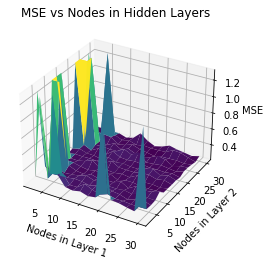

In [29]:
nodes_range = np.arange(2, 32, 2)
mse_data = np.zeros((len(nodes_range), len(nodes_range)))

for i, unit1 in enumerate(nodes_range):
    for j, unit2 in enumerate(nodes_range):
        nn_model = keras.Sequential([
            keras.Input(shape=(13,), name='input'),
            keras.layers.Dense(units=unit1, activation='relu', name='L1'),
            keras.layers.Dense(units=unit2, activation='relu', name='L2'),
            keras.layers.Dense(units=1, activation='linear', name='output')
        ])

        nn_model.compile(
            loss=tf.keras.losses.MeanSquaredError(),
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            metrics=['mse']
        )

        history = nn_model.fit(
            X_train, y_train,
            epochs=300,
            verbose=0
        )
        loss, mse = nn_model.evaluate(X_test, y_test, verbose=0)
        print('Nodes1: ', unit1, 'Nodes2: ', unit2, 'Loss: ', str(loss) , 'MSE: ', str(mse))
        mse_data[i, j] = mse

# Create a meshgrid for the 3D plot
X, Y = np.meshgrid(nodes_range, nodes_range)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, mse_data, cmap='viridis')
ax.set_xlabel('Nodes in Layer 1')
ax.set_ylabel('Nodes in Layer 2')
ax.set_zlabel('MSE')
ax.set_title('MSE vs Nodes in Hidden Layers')

plt.show()

In [30]:
min_value = np.min(mse_data)
min_indices = np.unravel_index(np.argmin(mse_data), mse_data.shape)
print("Minimum value in the matrix:", min_value)
print("Indices of the minimum value:", min_indices)

Minimum value in the matrix: 0.23126348853111267
Indices of the minimum value: (12, 9)


In [42]:
nn_model = keras.Sequential([
    keras.Input(shape=(13,), name='input'),
    keras.layers.Dense(units=12, activation='relu', name='L1'),
    keras.layers.Dense(units=9, activation='relu', name='L2'),
    keras.layers.Dense(units=1, activation='linear', name='output')
])

# Print model summary
nn_model.summary()

Model: "sequential_226"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 12)                168       
_________________________________________________________________
L2 (Dense)                   (None, 9)                 117       
_________________________________________________________________
output (Dense)               (None, 1)                 10        
Total params: 295
Trainable params: 295
Non-trainable params: 0
_________________________________________________________________


In [43]:
nn_model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mse'])

In [44]:
history = nn_model.fit(
    X_train,y_train,
    epochs=300,
    verbose=0
)
loss, mse = nn_model.evaluate(X_test, y_test, verbose=0)
print('Loss: ', str(loss) , 'MSE: ', str(mse))

Loss:  0.2640490233898163 MSE:  0.2640490233898163


In [45]:
nn_train_pred = nn_model.predict(X_train)
nn_train_rmse = mean_squared_error(y_train, nn_train_pred)
nn_train_r2 = r2_score(y_train, nn_train_pred)
print('\nNeural Network Model Performance on Training\n\nRMSE =   %.2f'% nn_train_rmse)
print('R^2 =   %.2f'% nn_train_r2)   


Neural Network Model Performance on Training

RMSE =   0.29
R^2 =   0.77


In [46]:
nn_pred = nn_model.predict(X_test)
# evaluate NN performance using RMSE and r^2
nn_rmse = mean_squared_error(y_test, nn_pred)
nn_r2 = r2_score(y_test, nn_pred)
print('\nNeural Network Model Performance\n\nRMSE =   %.2f'% nn_rmse)
print('R^2 =   %.2f'% nn_r2)  


Neural Network Model Performance

RMSE =   0.26
R^2 =   0.80


### 1.3.5 Final Model Selection

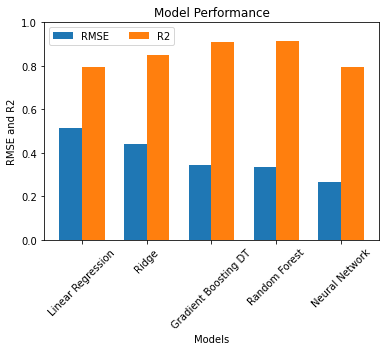

In [47]:
RMSE_Results = [lr_rmse, lr2_rmse, gbdt_rmse, rf_rmse, nn_rmse]
R2_Results = [lr_r2, lr2_r2, gbdt_r2, rf_r2, nn_r2]
rg= np.arange(5)
width = 0.35
fig = plt.figure()
# create bar plot with RMSE results
plt.bar(rg, RMSE_Results, width, label='RMSE')
# create bar plot with R2 results
plt.bar(rg + width, R2_Results, width, label='R2')
# call plt.xticks() to add labels under the bars
models = ['Linear Regression', 'Ridge', 'Gradient Boosting DT', 'Random Forest', 'Neural Network']
plt.xticks(rg + width/2, models, rotation=45)
# label the x and y axis of the plot
plt.xlabel('Models')
plt.ylabel('RMSE and R2')
plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

Looking at the plot, we can see that GBDT model and RF model have similar performances. We
ended up selecting GBDT as our final model after repeated training. In addition, to our surprise, our NN model performs similarly as the baseline linear regression model in terms of rˆ2. However, the NN model has the lowest MSE, which means that it has the lowest variability.

### 1.3.6 Further Exploration and Interpretation

   From the feature importance plots for both the GBDT model and the RF model, we can see that
life expectancy, social support, and GDP play the most important roles in predicting life ladder. We did not perform feature selection based on these plots as our data set is relatively small and does not contain a lot of features. As a result, the computation time is reasonable and dropping features is not a priority.
   
   Furthermore, we use SHAP to attempt to explain our best-performing GBDT model as a whole and for specific observations.

In [78]:
# initialize the SHAP explainer with the GBDT model
explainer = shap.Explainer(gbdt_model)
# calculate shap values for the entire data set
shap_values = explainer(X)
shap_values.shape

(1352, 13)

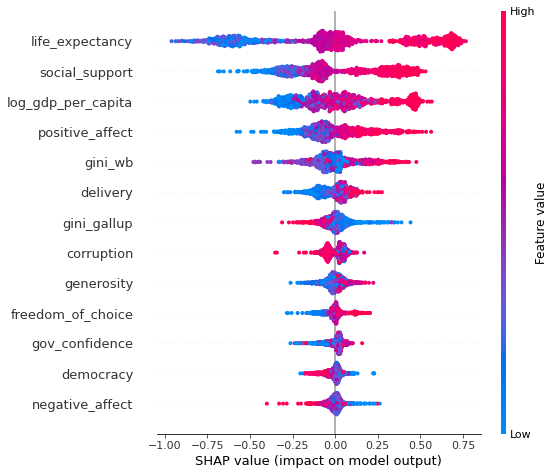

In [80]:
# summary plot
shap.summary_plot(shap_values, X)

The summary plot shows that life expectancy has the largest impact on life ladder and has a
positive correlation with life ladder, as expected. Social support, log GDP, and positive affect also have relatively large impacts and positive correlations with life ladder. Gini gallup, corruption, and negative affect have some impacts on and negative correlations with life ladder.
We proceed to look at individual observations of interest to us, including the United States,
Ukraine, and Costa Rica (as China has missing value and got dropped from our dataframe).

In [81]:
base_value = shap_values.base_values[0][0]
print(f'The expected value for life ladder is {base_value}.')

The expected value for life ladder is 5.398589359629051.


The life ladder for the U.S. is 6.991759299999999.


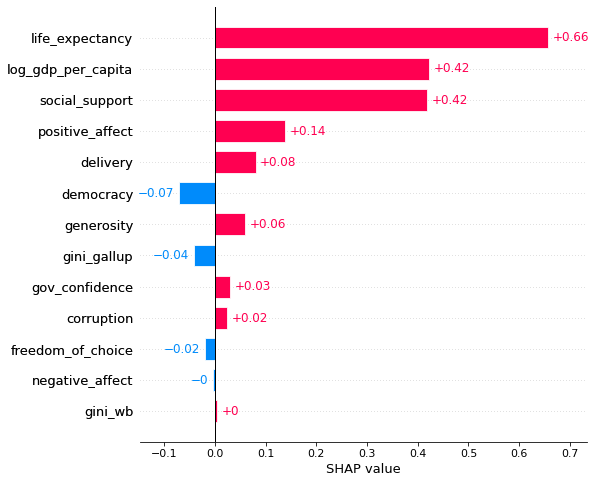

In [82]:
print(f'The life ladder for the U.S. is {y.iloc[1272]}.')
shap.plots.bar(shap_values[1272], max_display=20)

The United States has a higher than average life ladder and it is mostly due to higher life
expectancy, log GDP, and social support. Notably, democracy, GINI index, and freedom of choice
have negative impacts on life ladder, compared to other countries, which is unexpected considering that the U.S. often prides on American democracy.

The life ladder for Ukraine is 4.311067104.


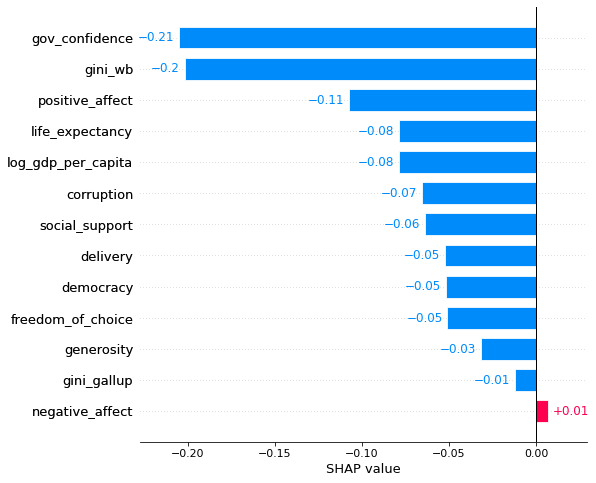

In [83]:
print(f'The life ladder for Ukraine is {y.iloc[1248]}.')
shap.plots.bar(shap_values[1248], max_display=20)

Ukraine has a lower than average life ladder prediction and its result is strongly influenced by government confidence and GINI index (income equality), among other features. It makes sense since there is great social stratification in Ukraine, where middle class is almost non-existent.

The life ladder for the Costa Rica is 7.22518158.


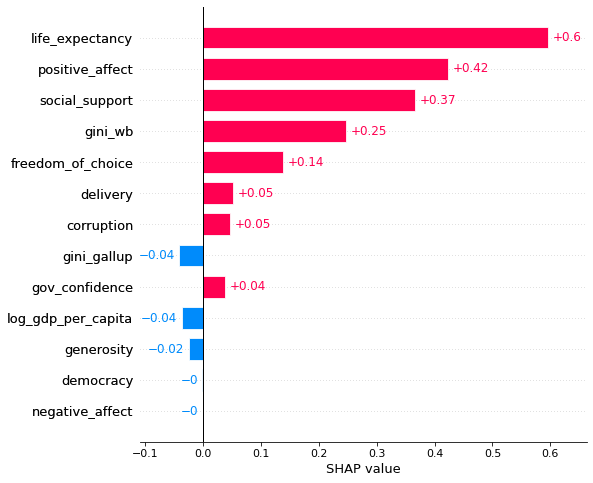

In [84]:
print(f'The life ladder for the Costa Rica is {y.iloc[281]}.')
shap.plots.bar(shap_values[281], max_display=20)

Costa Rica has the highest life ladder prediction of all three countries. The higher life ladder is impacted by life expectancy, positive affect, and social support, which fit our expectation since Costa Rica has a great social support system and healthy environment despite a lower national GDP.

In conclusion, our final gradient-boosting decision tree model performs well with a RMSE of
0.34 and Rˆ2 value of 0.91. It is a rather interpretable model with life expectancy, social support, and GDP having the most pronounced impacts on life ladder. We also examined individual countries using SHAP, which provided more interpretation and explanation.